### Deep autoencoders

**Importações iniciais**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense

Using TensorFlow backend.


**Leitura da base de dados**

In [2]:
(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

In [3]:
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:])))
previsores_teste = previsores_teste.reshape((len(previsores_teste), np.prod(previsores_teste.shape[1:])))

**Construção do Autoencoder**

In [7]:
autoencoder = Sequential()
autoencoder.add(Dense(units = 128, activation = 'relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation = 'relu'))
autoencoder.add(Dense(units = 32, activation = 'relu'))
                
autoencoder.add(Dense(units = 64, activation = 'relu'))
autoencoder.add(Dense(units = 128, activation = 'relu'))
autoencoder.add(Dense(units = 784, activation = 'sigmoid'))

In [8]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
________________________________________________

In [12]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])
autoencoder.fit(previsores_treinamento, previsores_treinamento,
               epochs = 50, batch_size = 256,
               validation_data = (previsores_teste, previsores_teste))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.2499 - accuracy: 0.7847 - val_loss: 0.1692 - val_accuracy: 0.7998
Epoch 2/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.1517 - accuracy: 0.8048 - val_loss: 0.1380 - val_accuracy: 0.8066
Epoch 3/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.1328 - accuracy: 0.8084 - val_loss: 0.1253 - val_accuracy: 0.8090
Epoch 4/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.1232 - accuracy: 0.8100 - val_loss: 0.1192 - val_accuracy: 0.8088
Epoch 5/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.1172 - accuracy: 0.8109 - val_loss: 0.1131 - val_accuracy: 0.8103
Epoch 6/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1124 - accuracy: 0.8115 - val_loss: 0.1092 - val_accuracy: 0.8109
Epoch 7/50
60000/60000 [==============================] - 3s 52us/st

In [14]:
dimensao_original = Input(shape = (784,))
camada_encoder1 = autoencoder.layers[0]
camada_encoder2 = autoencoder.layers[1]
camada_encoder3 = autoencoder.layers[2]

encoder = Model(dimensao_original, 
               camada_encoder3(camada_encoder2(camada_encoder1(dimensao_original))))

encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [17]:
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

**Visualização de imagens**

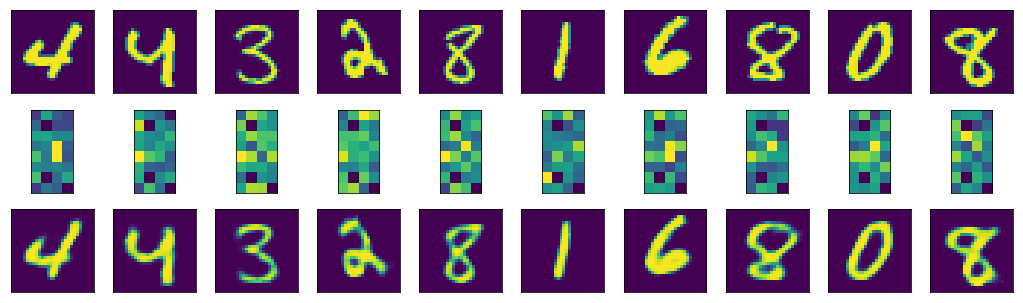

In [18]:
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)
plt.figure(figsize=(18,18))
for i, indice_imagem in enumerate(imagens_teste):   
    # imagem original
    eixo = plt.subplot(10,10,i + 1)
    plt.imshow(previsores_teste[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
    
    # imagem codificada
    eixo = plt.subplot(10,10,i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(8,4))
    plt.xticks(())
    plt.yticks(())
    
     # imagem reconstruída
    eixo = plt.subplot(10,10,i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
    